# Pandas: Collaborative graded assignment 4
This notebook contains the fourth graded collaborative assignment of the 2023 Coding the Humanities course, and it is based on the [5. Data wrangling with Pandas](../../4_PandasDataWrangling.ipynb) course material.

This is a collaborative assignment. In the text cell below, please include all the names of your group members.

Below that, answer the question using a mix of code cells and text cells in a way that would make your answers understandable to outsiders. To explain your code, you can use commenting (#) and/or text cells, similar to what you see in the course materials.

If you used code or a solution from the internet (such as StackOverflow) or another external resource, please make reference to it (in any format). Unattributed copied code will be considered plagiarism and therefore fraud.


**Authors of this answer:**
George Cotea, Ruben van Dijkhauzen, Raluca Mihaila, Nadia Lentini

# Assignment | Analysing Black Mirror

Black Mirror is a British near-future sci-fi series known for commenting on contemporary social issues, created by Charlie Brooker. Initially aired on the British Channel 4, it later became famous as a Netflix series. The first season was broadcast around the end of 2011, and the fifth season was released in 2019. In this assignment, we will explore this TV series' IMDB ratings, which are available in blackmirror.csv.

As always, feel free to re-use code from different questions.

For the Visualisations:
Do not worry too much about what they look like - we will talk more about visualization next week. But if you want, you can look ahead to notebook 6. The labels Panda puts on your plot will come from the dataframe, so make sure columns have sensible names there to have sensible labels.

Do make sure the visualizations are visible in the notebook when you submit it. Or, you can save your visualisations as a pdf or png file and include them in your zipped submission.

1.   Which director has directed the most number of episodes?

In [1]:
# Getting the directors from the /data/blackmirror.csv file
import pandas as pd
df = pd.read_csv('data/blackmirror.csv')
directors = df['director']
# Creating the dictionary with the number of episodes per director
directors_dict = {}
for director in directors:
    if director in directors_dict:
        directors_dict[director] += 1
    else:
        directors_dict[director] = 1
# Finding the director with the most episodes
max_episodes = 0
for director in directors_dict:
    if directors_dict[director] > max_episodes:
        max_episodes = directors_dict[director]
        max_director = director
# Printing the pandas table with the directors and the number of episodes
directors_df = pd.DataFrame.from_dict(directors_dict, orient='index', columns=['episodes'])
directors_df


,episodes
Otto Bathurst,1
Euros Lyn,1
Brian Welsh,1
Owen Harris,3
Carl Tibbetts,2
Bryn Higgins,1
Joe Wright,1
Dan Trachtenberg,1
James Watkins,1
Jakob Verbruggen,1


In [3]:
#Printing the director with the most episodes
print('The director with the most episodes is', max_director, 'with', max_episodes, 'episodes.')

The director with the most episodes is Owen Harris with 3 episodes.


2.   Create a function that calculates the frequency of words in a string. Apply it to the description of all of the episodes of Black Mirror. What are the ten most frequent words in the descriptions? Write down your interpretations in the notebook.

In [4]:
# Creating a function that calculates the frequency of words in a string
def stringFrequency(string):
    # Creating a dictionary with the frequency of words in the string
    string_dict = {}
    for word in string.split():
        if word in string_dict:
            string_dict[word] += 1
        else:
            string_dict[word] = 1
    # Creating a pandas dataframe with the words and their frequency
    string_df = pd.DataFrame.from_dict(string_dict, orient='index', columns=['frequency'])
    # Sorting the dataframe by frequency
    string_df = string_df.sort_values(by=['frequency'], ascending=False)
    return string_df
# Creating a dataframe with the descriptions of all the episodes
descriptions = df['desc']
# Creating a string with all the descriptions
descriptions_string = ''
for description in descriptions:
    descriptions_string += description + ' '
# Applying the function to the string with all the descriptions
stringFrequency(descriptions_string)

,frequency
a,27
to,17
the,16
of,14
and,10
...,...
told,1
season,1
Christmas,1
during,1


3.   Create a bar plot/histogram for the IMDB ratings per episode with respect to the episode's title. From this plot, decipher which were the highest and lowest ratest shows.

The highest rated episode is White Christmas
The lowest rated episode is Rachel, Jack and Ashley Too


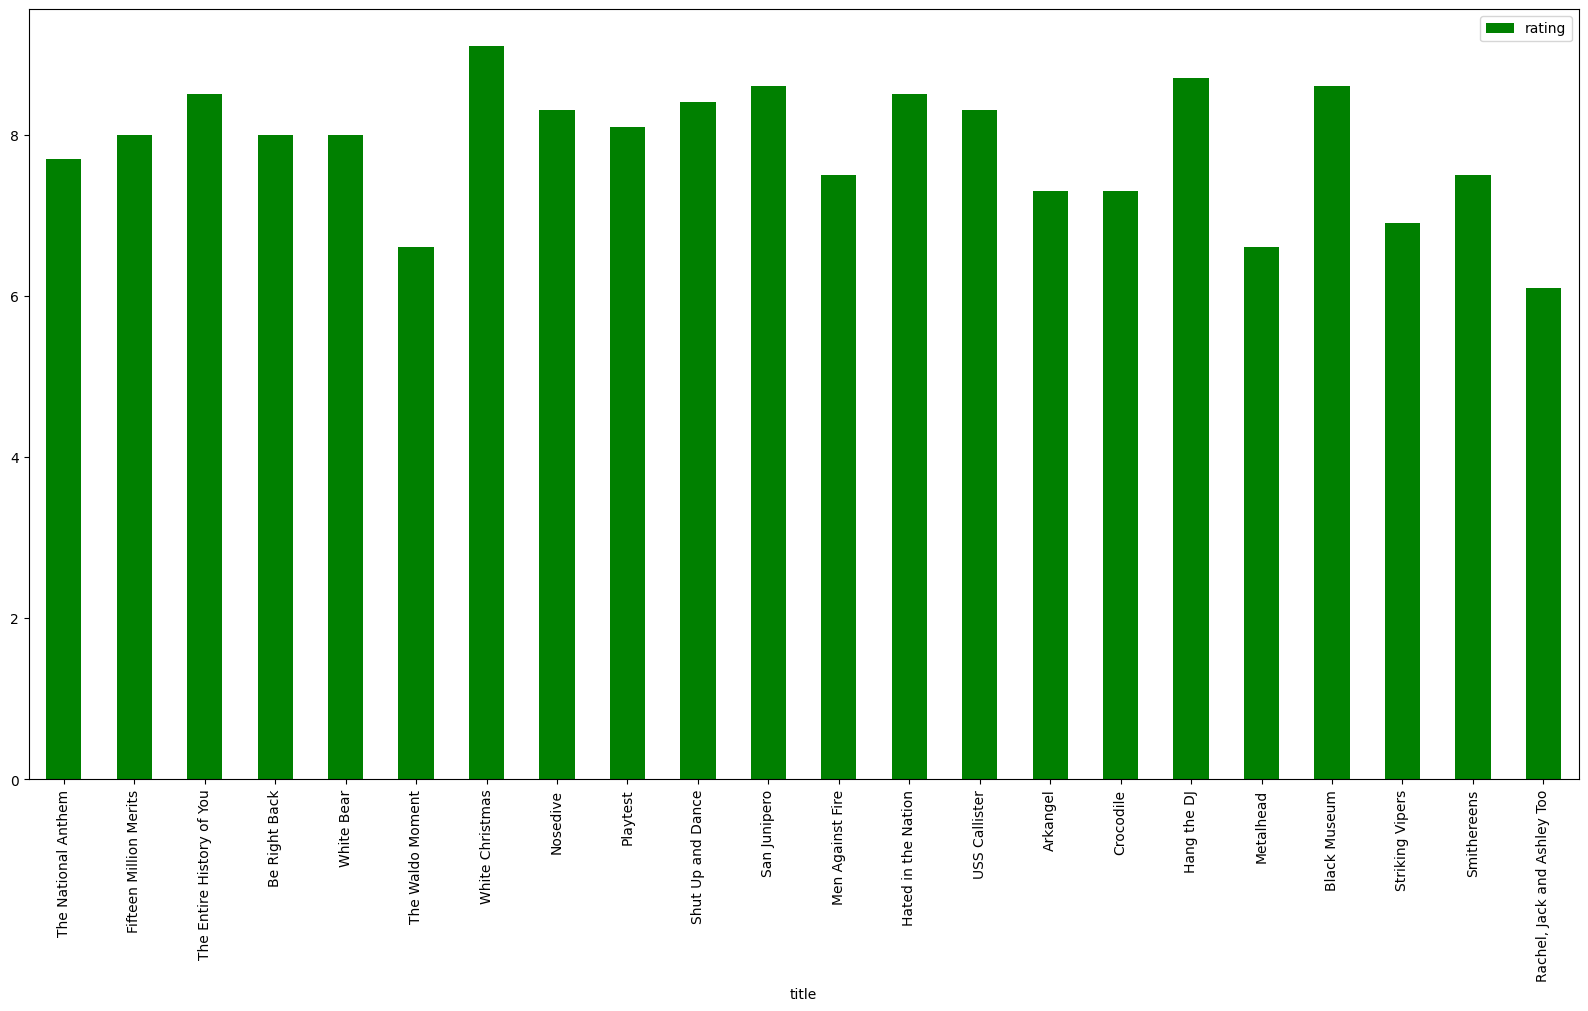

In [39]:
# Importing the pandas library
import pandas as pd
# Making a data frame of the IMDB rating per title in respect of the episode number
df = pd.read_csv('data/blackmirror.csv')
df = df[['title','rating']]
# Plotting the dataframe with pandas in a bar graph
df.plot.bar(x='title', y='rating', rot=90, figsize=(20, 10), color='green')
# Printing the highest rated episode
print('The highest rated episode is', df['title'][df['rating'].idxmax()])
# Printing the lowest rated episode
print('The lowest rated episode is', df['title'][df['rating'].idxmin()])


4.   Create two different line plots for the IMDB ratings of Black Mirror season 3 and season 4, with the episodes in their episode number order. With these plots, you can compare the ratings of the two seasons throughout. Interpret the visualisation.

Bonus: Extra point if you can put the the two lines in the same plot somehow, either by having a continuous line for season 3 and 4 or by overlaying them.
To filter the dataframe by multiple values, you could use the `isin()` function (https://pandas.pydata.org/docs/reference/api/pandas.Series.isin.html#pandas.Series.isin) to check if an episode is in one of a list of seasons: `df.loc[df.season.isin(seasons)]` where `seasons` is a list.

Text(0, 0.5, 'IMDb Rating')

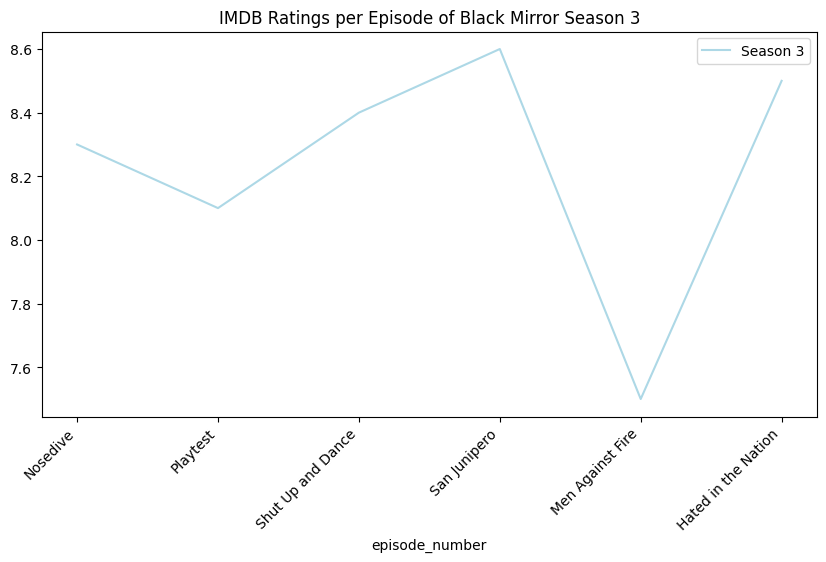

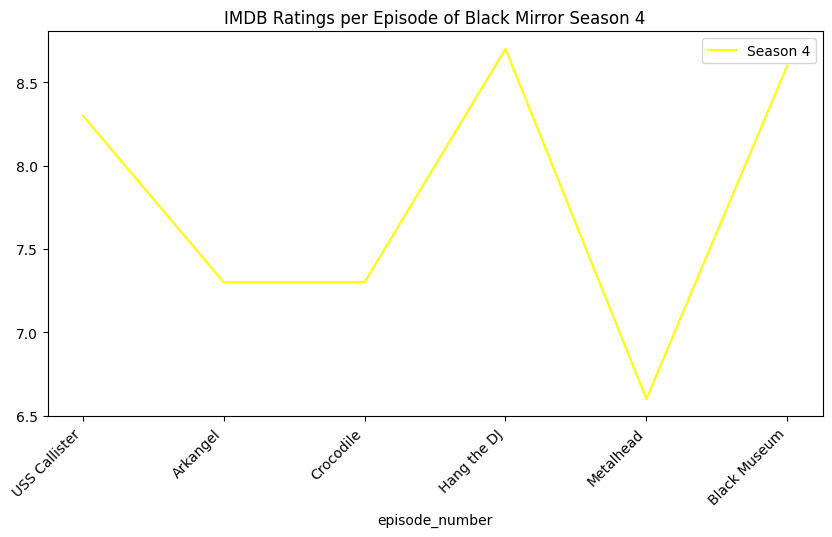

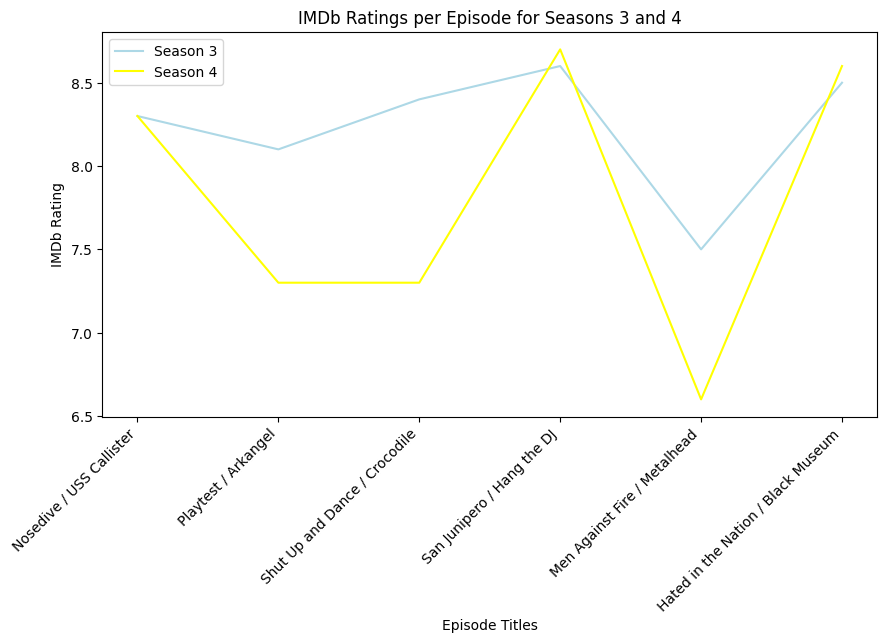

In [24]:
# Importing the pandas library
import pandas as pd

# Reading the csv file
df = pd.read_csv('data/blackmirror.csv')

# Creating a dataframe with the episodes and imdb ratings of season 3 as well as a legend for the line graph that uses the episode titles
season3 = df.loc[df.season.isin([3])]
season3 = season3[['episode_number', 'title', 'rating']]
season3 = season3.sort_values(by=['episode_number'])
season3 = season3.reset_index(drop=True)

# Creating a dataframe with the episodes and imdb ratings of season 4
season4 = df.loc[df.season.isin([4])]
season4 = season4[['episode_number', 'title', 'rating']]
season4 = season4.sort_values(by=['episode_number'])
season4 = season4.reset_index(drop=True)

#Plotting the dataframe for season 3 with pandas in a line graph
ax = season3.plot.line(x='episode_number', y='rating', label='Season 3', color='lightblue', figsize=(10, 5), title = 'IMDB Ratings per Episode of Black Mirror Season 3')
ax.set_xticks(season3['episode_number'])
ax.set_xticklabels(season3['title'], rotation=45, ha='right')

#Plotting the dataframe for season 4 with pandas in a line graph
ax = season4.plot.line(x='episode_number', y='rating', label='Season 4', color='yellow', figsize=(10, 5), title = 'IMDB Ratings per Episode of Black Mirror Season 4')
ax.set_xticks(season4['episode_number'])
ax.set_xticklabels(season4['title'], rotation=45, ha='right')


# Aligning the two dataframes by episode number
seasons = pd.merge(season3, season4, on='episode_number', suffixes=('_season3', '_season4'))

# Create a new DataFrame with episode titles and ratings for both seasons
seasons_combined = pd.DataFrame({
    'episode_title': seasons['title_season3'] + ' / ' + seasons['title_season4'],
    'rating_season3': seasons['rating_season3'],
    'rating_season4': seasons['rating_season4']
})

# Reset the index to use episode titles
seasons_combined.set_index('episode_title', inplace=True)

# Plotting the combined dataframe with pandas in a line graph
ax = seasons_combined.plot.line(y=['rating_season3', 'rating_season4'], label=['Season 3', 'Season 4'], color=['lightblue', 'yellow'], figsize=(10, 5), title = 'IMDb Ratings per Episode for Seasons 3 and 4')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_xlabel('Episode Titles')
ax.set_ylabel('IMDb Rating')